## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) identifies
clusters as regions of high point density.

Advantages:
- Does not require specifying number of clusters
- Can detect arbitrary-shaped clusters
- Explicitly identifies noise points

This notebook demonstrates DBSCAN on a dataset with both dense regions and noise.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from rice_ml import train_test_split, standardize


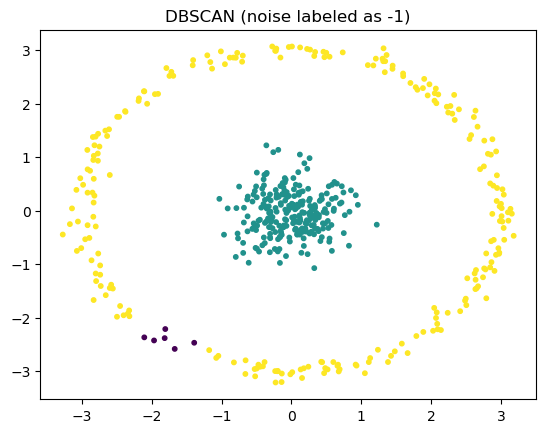

Clusters found: 2
Noise points: 6


In [3]:
from rice_ml.unsupervised_learning.dbscan import DBSCAN

rng = np.random.default_rng(2)
blob = rng.normal((0,0), 0.4, size=(250,2))
ring = rng.normal((0,0), 0.1, size=(250,2))
theta = rng.uniform(0, 2*np.pi, size=250)
ring[:,0] += 3*np.cos(theta)
ring[:,1] += 3*np.sin(theta)

X = np.vstack([blob, ring])

db = DBSCAN(eps=0.5, min_samples=8).fit(X)
labels = db.labels_

plt.scatter(X[:,0], X[:,1], c=labels, s=10)
plt.title("DBSCAN (noise labeled as -1)")
plt.show()

print("Clusters found:", len(set(labels)) - (1 if -1 in labels else 0))
print("Noise points:", np.sum(labels == -1))
